#Assignment 1
In this first assignment you will explore a dataset, visualizing the dataset in various ways, and doing a preliminary analysis on the data. 

For this assignment we are going to use the functionality of Pandas (the library, *not* the unbearably cute animal): https://pandas.pydata.org/ in order to manipulate datasets.
In addition to Pandas, we are going to use Matplotlib (https://matplotlib.org/) and Numpy (http://www.numpy.org/) and you may also find Seaborn (https://seaborn.pydata.org/) useful for some data visualization.

Unless you are explicitly asked to *implement* a particular functionality, you may assume that you may use an existing implementation from the libraries above (or some other library that you may find, as long as you *document* it).

Before you start, make sure you have installed all those packages in your local Jupyter instance, as follows:

conda install numpy pandas matplotlib seaborn



In [109]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import random
import math

#make sure you import here everything else you may need

## Question 0: Getting real data [0%] 

In this assignment you are going to use data from the UCI Machine Learning repository ( https://archive.ics.uci.edu/ml/index.php ). In particular, you are going to use the famous Iris dataset: https://archive.ics.uci.edu/ml/datasets/Iris


In [110]:

data_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']
data = pd.read_csv('iris.data', names = data_names)
data.head()

data_setosa = pd.DataFrame(columns = data_names)
data_versicolor = pd.DataFrame(columns = data_names)
data_virginica = pd.DataFrame(columns = data_names)
for x in data.index:
    if (data.at[x,'label'] == 'Iris-setosa'):
        data_setosa = data_setosa.append({'sepal_length' : data.at[x,'sepal_length'], 'sepal_width' : data.at[x,'sepal_width'], 'petal_length' : data.at[x,'petal_length'], 'petal_width' : data.at[x,'petal_width']}, ignore_index=True)
    if (data.at[x,'label'] == 'Iris-versicolor'):
        data_versicolor = data_versicolor.append({'sepal_length' : data.at[x,'sepal_length'], 'sepal_width' : data.at[x,'sepal_width'], 'petal_length' : data.at[x,'petal_length'], 'petal_width' : data.at[x,'petal_width']}, ignore_index=True)
    if (data.at[x,'label'] == 'Iris-virginica'):
        data_virginica = data_virginica.append({'sepal_length' : data.at[x,'sepal_length'], 'sepal_width' : data.at[x,'sepal_width'], 'petal_length' : data.at[x,'petal_length'], 'petal_width' : data.at[x,'petal_width']}, ignore_index=True)


## Question 1: Data Visualization [20%]

### Question 1a: Scatterplots [10%]
1. Plot the scatterplot of all pairs of features and color the points by class label [5%]
2. Which pair of features is (visually) the most correlated?  [2.5%]
3. Can you think of a reason why looking at this plot would be useful in a task where we would have to classify flowers by label? [2.5%]

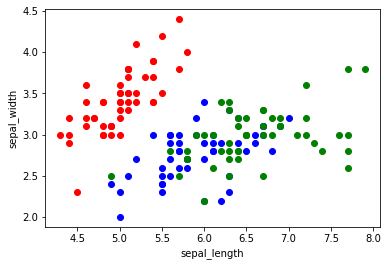

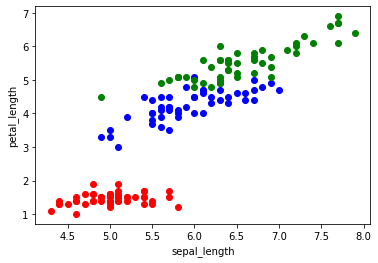

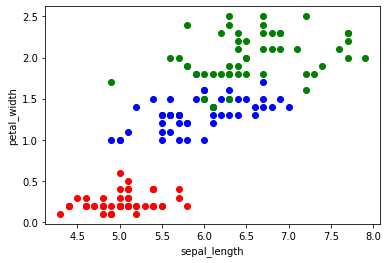

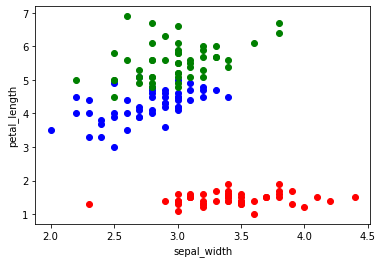

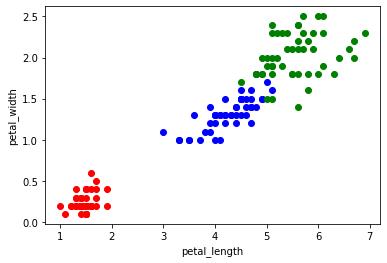

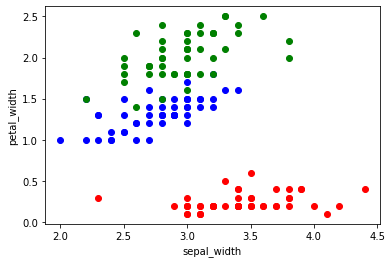

In [111]:
pair1 = ['sepal_length', 'sepal_length', 'sepal_length', 'sepal_width', 'petal_length', 'sepal_width']
pair2 = ['sepal_width', 'petal_length', 'petal_width', 'petal_length', 'petal_width', 'petal_width']
setosa_pair1 = [data_setosa.sepal_length, data_setosa.sepal_length, data_setosa.sepal_length, data_setosa.sepal_width, data_setosa.petal_length, data_setosa.sepal_width]
setosa_pair2 = [data_setosa.sepal_width, data_setosa.petal_length, data_setosa.petal_width, data_setosa.petal_length, data_setosa.petal_width, data_setosa.petal_width]
versicolor_pair1 = [data_versicolor.sepal_length, data_versicolor.sepal_length, data_versicolor.sepal_length, data_versicolor.sepal_width, data_versicolor.petal_length, data_versicolor.sepal_width]
versicolor_pair2 = [data_versicolor.sepal_width, data_versicolor.petal_length, data_versicolor.petal_width, data_versicolor.petal_length, data_versicolor.petal_width, data_versicolor.petal_width]
virginica_pair1 = [data_virginica.sepal_length, data_virginica.sepal_length, data_virginica.sepal_length, data_virginica.sepal_width, data_virginica.petal_length, data_virginica.sepal_width]
virginica_pair2 = [data_virginica.sepal_width, data_virginica.petal_length, data_virginica.petal_width, data_virginica.petal_length, data_virginica.petal_width, data_virginica.petal_width]

for x in range(0, 6):
    fig, features = plt.subplots() 
    features.set_xlabel(pair1[x])
    features.set_ylabel(pair2[x])
    features.scatter(setosa_pair1[x], setosa_pair2[x], c='red')
    features.scatter(versicolor_pair1[x], versicolor_pair2[x], c='blue')
    features.scatter(virginica_pair1[x], virginica_pair2[x], c='green')


Your answer here:
2. Petal length and petal width are the most visually correlated. 
3. This plot will help me classify the iris flower type based solely on petal width and petal length. 



### Question 1b: Boxplot and Histogram [10%]

1. Plot the boxplot for each feature of the dataset (you can put all boxplots on a single figure) [4%]
2. Plot the histogram only for petal length [4%]
3. Does the histogram for petal length give more information than the boxplot? If so, what information? [2%]

/tmp/ipykernel_10138/3531845527.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])


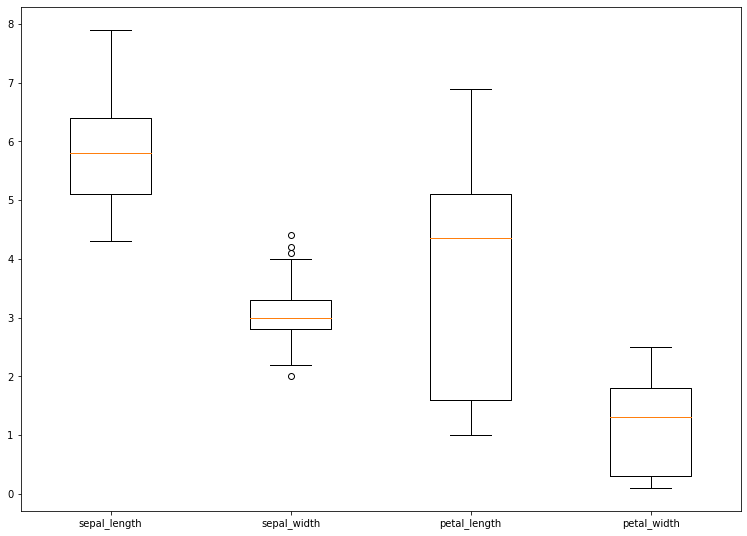

(array([37., 13.,  0.,  3.,  8., 26., 29., 18., 11.,  5.]),
 array([1.  , 1.59, 2.18, 2.77, 3.36, 3.95, 4.54, 5.13, 5.72, 6.31, 6.9 ]),
 <BarContainer object of 10 artists>)

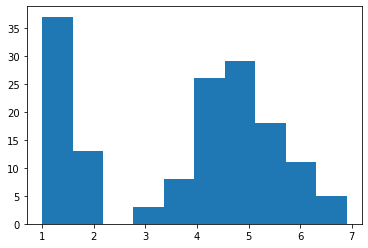

In [112]:
#1. boxplot
features_data = [data.sepal_length, data.sepal_width, data.petal_length, data.petal_width] 
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
ax.boxplot(features_data)
plt.show()

#2. histogram
fig, ax2 = plt.subplots()
ax2.hist(data.petal_length)


#WORKS CITED: https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/
#https://matplotlib.org/stable/plot_types/stats/boxplot_plot.html
#https://matplotlib.org/stable/plot_types/stats/hist_plot.html


Your answer here:

3. Yes, the histogram reveals that the data for petal length is bimodal, unlike the boxplot. 

## Question 2: Distance computation [40%]



### Question 2a: Implement the Lp distance function [20%]
1. Write code that implements the Lp distance function between two data points as we saw it in class [15%]
2. Verify that it is correct by comparing it for p=2 against an existing implementation in Numpy for the two selected data points below. Note that the difference of the distances may not be exactly 0 due to numerical precision issues. [5%]

In [113]:
distance = 0
p = 2
for x in range (0,4): 
    diff = abs(data.iloc[0, x] - data.iloc[1, x])
    distance += math.pow(diff, p)

print(math.pow(distance, 1/p))

#works cited: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html#pandas.DataFrame.loc
#https://www.geeksforgeeks.org/loop-or-iterate-over-all-or-certain-columns-of-a-dataframe-in-python-pandas/

0.5385164807134502


In [114]:
distance = 0
p = 2
for x in range (0,4): 
    diff = abs(data.iloc[0, x] - data.iloc[1, x])
    distance += math.pow(diff, p)

print("My equation: " + str(math.pow(distance, 1/p)))

print("Numpy: " + str(np.linalg.norm(data.loc[0][0:4]-data.loc[1][0:4], 2)))


#works cited: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html#pandas.DataFrame.loc
#https://www.geeksforgeeks.org/loop-or-iterate-over-all-or-certain-columns-of-a-dataframe-in-python-pandas/

My equation: 0.5385164807134502
Numpy: 0.5385164807134502


### Question 2b: Compute the distance matrix between all data points [20%]
1. Compute an $N\times N$ distance matrix between all data points (where $N$ is the number of data points) [5%]
2. Plot the above matrix and include a colorbar. [5%]
3. What is the minimum number of distance computations that you can do in order to populate every value of this matrix? (note: it is OK if in the first two questions you do all the $N^2$ computations) [5%]
4. Note that the data points in your dataset are sorted by class. What do you observe in the distance matrix? [5%]

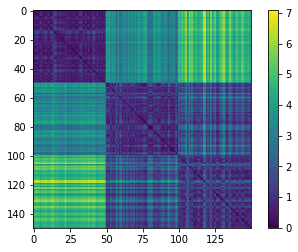

In [116]:
size = len(data)
d_matrix = np.zeros((size,size))

for x in range (0,size):
    for y in range (0,size): 
        d_matrix[x][y] = np.linalg.norm(data.loc[x][0:4]-data.loc[y][0:4], 2)
plt.imshow(d_matrix)
plt.colorbar()

#works cited: https://numpy.org/doc/stable/reference/generated/numpy.zeros.html
#https://stackoverflow.com/questions/42116671/how-to-plot-a-2d-matrix-in-python-with-colorbar-like-imagesc-in-matlab

Your answer here:
3. 11100 calculations are the minimum needed. We get this from: (150 * 150)/2 - 150
4. The distance matrix shows that setosa and virginica have the greatest distance between their features than any other flowers. Versicolor is also closer in distance to virginica than it is to setosa. 

## Question 3: Data Sampling [40%]

Sometimes datasets are too big, or come in a streaming fashion, and it is impossible for us to process every single data point, so we have to resort to sampling methods. In this question, you will implement the popular "reservoir sampling" method, which is mostly used to obtain a uniform random sample of a data stream. Subsequently, you will experiment with sampling directly all the data and conducting stratified sampling (by class label) and observe the results in the data distribution.

### Question 3a: Reservoir Sampling [20%]
1. Implement reservoir sampling as we saw it in class. Create a 'reservoir_sampling' function because it will be useful for the next question. [15%]

2. Run reservoir sampling with reservoir size $M = 15$ and plot the histogram of the petal length feature for the sampled dataset [5%]

In [66]:
def reservoir_sampling(stream,M):
    N = len(stream)
    res = [0] * M
    for x in range(0,N):
        if x < M: 
            res[x] = stream.at[x,'petal_length']
        else: 
            j = random.randint(0, x)
            if j < M:
                res[j] = stream.at[x, 'petal_length']
    return res

#works cited: https://docs.python.org/3/library/random.html

Text(0.5, 0, 'petal_length')

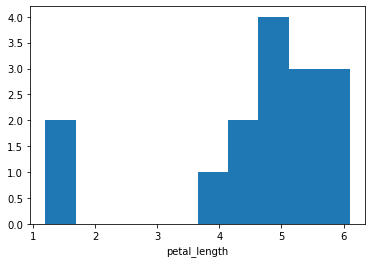

In [107]:
sample = reservoir_sampling(data, 15)
plt.hist(sample) 
plt.xlabel("petal_length")

### Question 3b: Stratified Sampling [20%]
1. Implement stratified sampling by class label, and within each stratum use the reservoir sampling function you implemented. [15%]
2. Run your stratified sampler with $M=5$ samples per class (so that we have 15 data points in total) and plot the histogram of the petal length feature for the sampled dataset [2.5%]
3. Do you observe any difference between the stratified and the non-stratified histograms? Which one resembles the original petal length distribution more closely? In order to answer this question you may want to run both sampling procedures a few times and observe which one gives a more accurate result on average. [2.5%]

Text(0.5, 0, 'petal_length')

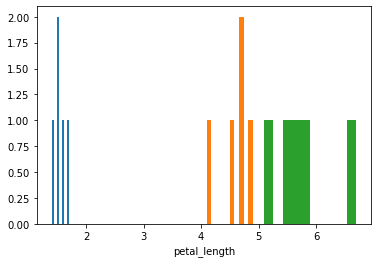

In [108]:
def stratified_reservoir(stream,M,start):
    N = len(stream)
    res = [0] * M
    for x in range(0,N):
        if x < M: 
            res[x] = stream.at[x+start,'petal_length']
        else: 
            j = random.randint(0, x)
            if j < M:
                res[j] = stream.at[x+start, 'petal_length']
    return res

sample1 = stratified_reservoir(data[0:49], 5, 0)
sample2 = stratified_reservoir(data[50:99], 5, 50)
sample3 = stratified_reservoir(data[100:149], 5, 100)

plt.hist(sample1) 
plt.hist(sample2) 
plt.hist(sample3) 
plt.xlabel("petal_length")


Your answer here:
3. 

3. The stratified sampling histogram has a much more obvious bimodality, as seen between the first set and the second two. The stratified histogram is also separated based on the iris type and it is clear that this is the cause of the bimodality in the data. After many runs of the sampling algorithms, it is clear that setosa is usually between 0-2, versicolor is between 3-5, and virginica between 4-7. The stratified histogram resembles the histogram of the entire dataset more closely. 